**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [2]:
cartoon = cv2.imread("/Users/lakshaybhadana/Downloads/images/cartoon.bmp")
cartoon_y = cv2.imread("/Users/lakshaybhadana/Downloads/images/cartoon_y.jpg")
girl = cv2.imread("/Users/lakshaybhadana/Downloads/images/girl.png") #grayscale image
girl_y = cv2.imread("/Users/lakshaybhadana/Downloads/images/girl_y.jpg")
fingerprint = cv2.imread("/Users/lakshaybhadana/Downloads/images/fingerprint.jpg")
fingerprint_y = cv2.imread("/Users/lakshaybhadana/Downloads/images/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

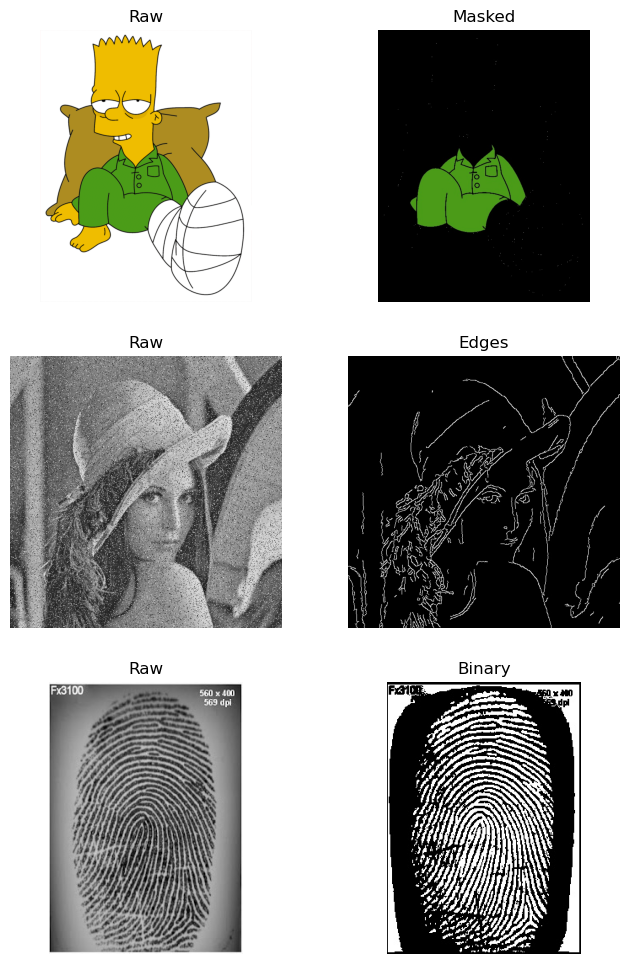

In [3]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

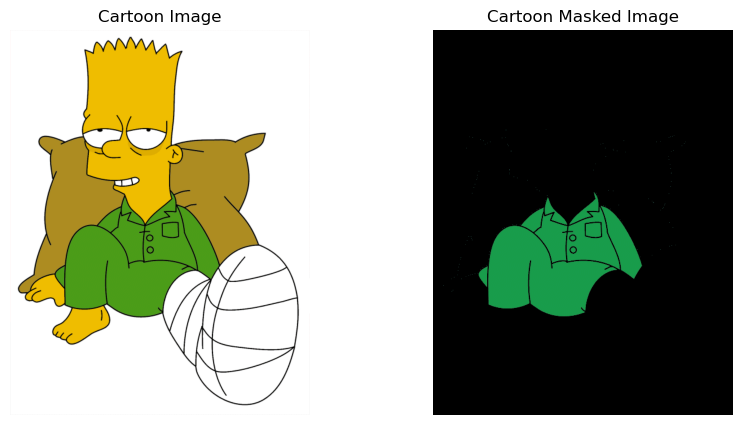

In [50]:
#START CODE HERE (Do all your processing here)

cartoon_y_mentee = None #(in RGB format only)

# Cartoon to HSV color space
hsv_cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# Color range to match the masked image 
lower_color = np.array([35, 50, 50])
upper_color = np.array([85, 255, 255])

# Mask based on the color range
mask = cv2.inRange(hsv_cartoon, lower_color, upper_color)

# Applying the mask to the image
cartoon_y_mentee = cv2.bitwise_and(cartoon, cartoon, mask=mask)
cartoon_y_mentee = cv2.cvtColor(cartoon_y_mentee,cv2.COLOR_BGR2RGB)

# Result
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
ax[0].set_title('Cartoon Image')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(cartoon_y_mentee, cv2.COLOR_BGR2RGB))
ax[1].set_title('Cartoon Masked Image')
ax[1].axis('off')

plt.show()

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

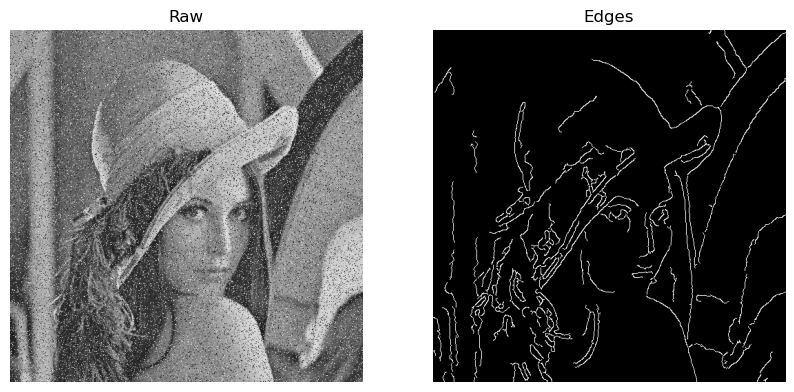

In [58]:
#START CODE HERE (Do all your processing here)

girl_y_mentee = None

# girl_image to grayscale
gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)

# Gaussian blur to reduce noise
gaussian_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Bilateral filtered
bilateral_filtered = cv2.bilateralFilter(gaussian_blurred, d=9, sigmaColor=65, sigmaSpace=75)

# Applying Canny edge detection
girl_y_mentee = cv2.Canny(bilateral_filtered, 25, 90)


# Result
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(girl, cv2.COLOR_BGR2RGB))
ax[0].set_title('Raw')
ax[0].axis('off')

ax[1].imshow(girl_y_mentee, cmap='gray')
ax[1].set_title('Edges')
ax[1].axis('off')

plt.show()

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

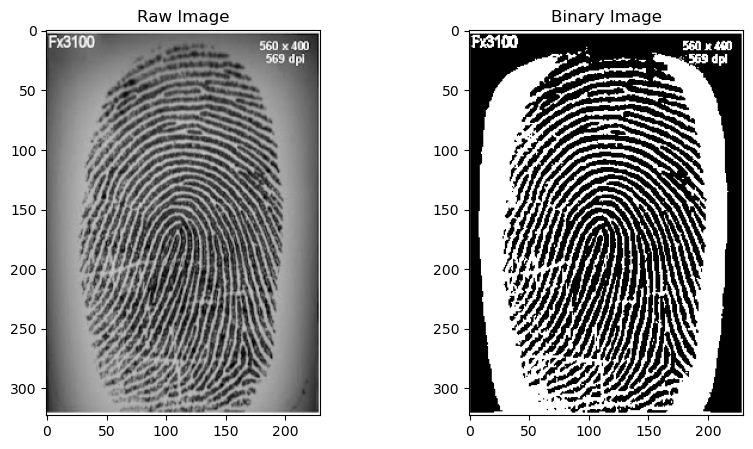

In [53]:
#START CODE HERE (Do all your processing here)

fingerprint_y_mentee = None #(in Binary format only i.e. pixel intensity = 0 or 255)

# Converting to grayscale
gray_image = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

# Binary threshold
_, fingerprint_y_mentee = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Raw Image")
plt.imshow(cv2.cvtColor(fingerprint, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Binary Image")
plt.imshow(fingerprint_y_mentee, cmap='gray')

plt.show()

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

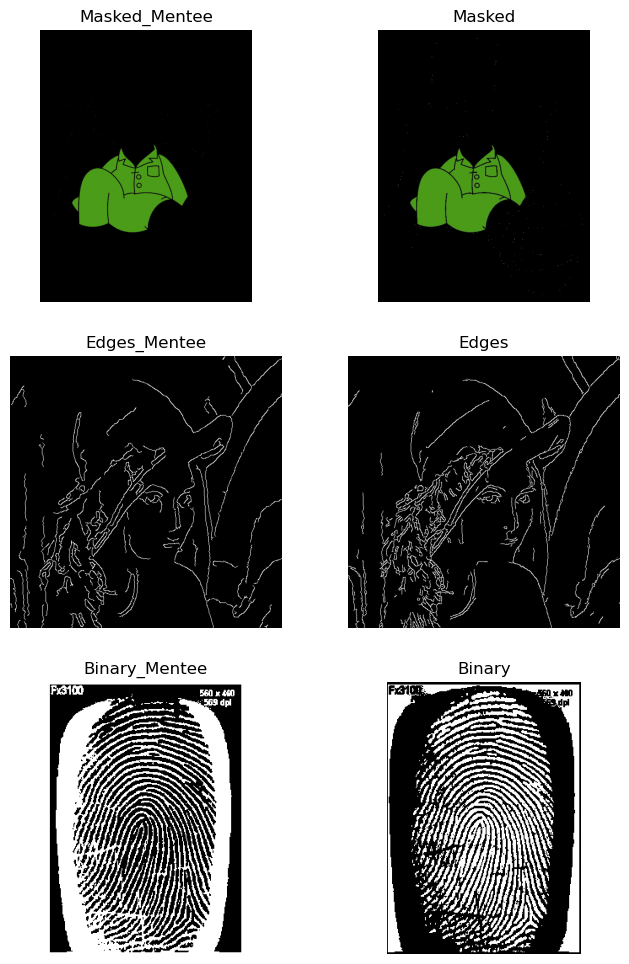

In [54]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()